**Data Cleaning & Visulization**

In [ ]:
# Importing All Libraries

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, LSTM
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#To upload the file from the local drive 

from google.colab import files
 
 
uploaded = files.upload()

Saving IOT-temp.csv to IOT-temp.csv


In [ ]:
# To create Dataframe & Use the CSV file

df = pd.read_csv('IOT-temp.csv')

In [ ]:
# knowing the dataset

df.head(5)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [ ]:
#getting to know DB

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [ ]:
#getting the "initial stat"
df.describe()

,temp
count,97606.000000
mean,35.053931
std,5.699825
min,21.000000
25%,30.000000
50%,35.000000
75%,40.000000
max,51.000000


In [ ]:
# Counting how many temperature values ​​are In or Out
df.groupby("out/in").count()

,id,room_id/id,noted_date,temp
out/in,,,,
In,20345,20345,20345,20345
Out,77261,77261,77261,77261


In [ ]:
# separating the dataset between In and Out values
df_IN = df[df["out/in"]=='In']
df_OUT = df[df["out/in"]=='Out']

In [ ]:
# To View df.out

df_OUT.head()

,id,room_id/id,noted_date,temp,out/in
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
10,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
11,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
16,__export__.temp_log_196094_38501388,Room Admin,08-12-2018 09:21,41,Out


In [ ]:
# To View df.in

df_IN.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
5,__export__.temp_log_196125_b0fa0b41,Room Admin,08-12-2018 09:29,31,In
6,__export__.temp_log_196121_01544d45,Room Admin,08-12-2018 09:28,29,In


In [ ]:
# performing the index reset df.in
df_IN.reset_index(drop=True)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In
3,__export__.temp_log_196125_b0fa0b41,Room Admin,08-12-2018 09:29,31,In
4,__export__.temp_log_196121_01544d45,Room Admin,08-12-2018 09:28,29,In
...,...,...,...,...,...
20340,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
20341,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
20342,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
20343,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


In [ ]:
# performing the index reset df.out

df_OUT.reset_index(drop=True)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
1,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
2,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
3,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
4,__export__.temp_log_196094_38501388,Room Admin,08-12-2018 09:21,41,Out
...,...,...,...,...,...
77256,__export__.temp_log_99990_0866b052,Room Admin,28-07-2018 07:07,32,Out
77257,__export__.temp_log_106366_5b89332c,Room Admin,28-07-2018 07:07,32,Out
77258,__export__.temp_log_128809_5b2685b6,Room Admin,28-07-2018 07:07,32,Out
77259,__export__.temp_log_111718_05b8d88d,Room Admin,28-07-2018 07:07,32,Out


In [ ]:
df_IN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20345 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20345 non-null  object
 1   room_id/id  20345 non-null  object
 2   noted_date  20345 non-null  object
 3   temp        20345 non-null  int64 
 4   out/in      20345 non-null  object
dtypes: int64(1), object(4)
memory usage: 953.7+ KB


In [ ]:
# To changing the datatype *object to date time*

df_IN['noted_date'] = pd.to_datetime(df_IN['noted_date'])

<ipython-input-15-3581cd557edc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IN['noted_date'] = pd.to_datetime(df_IN['noted_date'])


In [ ]:
df_IN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20345 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          20345 non-null  object        
 1   room_id/id  20345 non-null  object        
 2   noted_date  20345 non-null  datetime64[ns]
 3   temp        20345 non-null  int64         
 4   out/in      20345 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 953.7+ KB


In [ ]:
df_IN.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,2018-08-12 09:30:00,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,2018-08-12 09:30:00,29,In
4,__export__.temp_log_196126_d30b72fb,Room Admin,2018-08-12 09:29:00,31,In
5,__export__.temp_log_196125_b0fa0b41,Room Admin,2018-08-12 09:29:00,31,In
6,__export__.temp_log_196121_01544d45,Room Admin,2018-08-12 09:28:00,29,In


In [ ]:
#Sorting the data time in df.in

df_IN = df_IN.sort_values(by=['noted_date'])

In [ ]:
df_IN.head()

,id,room_id/id,noted_date,temp,out/in
16218,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In
16186,__export__.temp_log_128828_1f2ca69c,Room Admin,2018-01-11 02:12:00,32,In
16176,__export__.temp_log_142141_12bd7384,Room Admin,2018-01-11 02:44:00,32,In
16174,__export__.temp_log_106858_cdf61926,Room Admin,2018-01-11 02:46:00,32,In
16167,__export__.temp_log_120068_a0fc57cc,Room Admin,2018-01-11 02:58:00,31,In


In [ ]:
df_IN.reset_index(drop=True)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In
1,__export__.temp_log_128828_1f2ca69c,Room Admin,2018-01-11 02:12:00,32,In
2,__export__.temp_log_142141_12bd7384,Room Admin,2018-01-11 02:44:00,32,In
3,__export__.temp_log_106858_cdf61926,Room Admin,2018-01-11 02:46:00,32,In
4,__export__.temp_log_120068_a0fc57cc,Room Admin,2018-01-11 02:58:00,31,In
...,...,...,...,...,...
20340,__export__.temp_log_41083_917dc7ae,Room Admin,2018-12-10 20:25:00,35,In
20341,__export__.temp_log_41090_c0ed0bd1,Room Admin,2018-12-10 20:35:00,34,In
20342,__export__.temp_log_41091_8546ae99,Room Admin,2018-12-10 20:37:00,35,In
20343,__export__.temp_log_41129_77d8da57,Room Admin,2018-12-10 21:31:00,34,In


In [ ]:
df_OUT.head()

,id,room_id/id,noted_date,temp,out/in
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
10,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
11,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
16,__export__.temp_log_196094_38501388,Room Admin,08-12-2018 09:21,41,Out


In [ ]:
#Sorting the data time in df.out

df_OUT = df_OUT.sort_values(by=['noted_date'])

In [ ]:
df_OUT.head()

,id,room_id/id,noted_date,temp,out/in
16217,__export__.temp_log_146101_e61c18d4,Room Admin,01-11-2018 00:07,40,Out
16216,__export__.temp_log_111262_7b3ed086,Room Admin,01-11-2018 00:09,39,Out
16215,__export__.temp_log_147650_344507e9,Room Admin,01-11-2018 00:13,40,Out
16214,__export__.temp_log_139505_cd77d7f9,Room Admin,01-11-2018 00:23,40,Out
16213,__export__.temp_log_127981_32c85db7,Room Admin,01-11-2018 00:25,40,Out


In [ ]:
df_OUT.reset_index(drop=True)

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_146101_e61c18d4,Room Admin,01-11-2018 00:07,40,Out
1,__export__.temp_log_111262_7b3ed086,Room Admin,01-11-2018 00:09,39,Out
2,__export__.temp_log_147650_344507e9,Room Admin,01-11-2018 00:13,40,Out
3,__export__.temp_log_139505_cd77d7f9,Room Admin,01-11-2018 00:23,40,Out
4,__export__.temp_log_127981_32c85db7,Room Admin,01-11-2018 00:25,40,Out
...,...,...,...,...,...
77256,__export__.temp_log_120293_372d0c5e,Room Admin,31-10-2018 23:47,39,Out
77257,__export__.temp_log_119348_c6513205,Room Admin,31-10-2018 23:52,40,Out
77258,__export__.temp_log_96071_10974210,Room Admin,31-10-2018 23:53,39,Out
77259,__export__.temp_log_125166_18e85606,Room Admin,31-10-2018 23:55,40,Out


In [ ]:
#existing records

print("existing records count is : " ,df_IN.count())
print("existing records count is : " ,df_OUT.count())

existing records count is :  id            20345
room_id/id    20345
noted_date    20345
temp          20345
out/in        20345
dtype: int64
existing records count is :  id            77261
room_id/id    77261
noted_date    77261
temp          77261
out/in        77261
dtype: int64


In [ ]:
#comparing the two temperatures statistically

frame = {'Temp_IN': df_IN.temp , 'Temp_OUT' : df_OUT.temp}
df_INOUT = pd.DataFrame(frame)
df_INOUT.head()

,Temp_IN,Temp_OUT
0,29.0,NaN
1,29.0,NaN
2,NaN,41.0
3,NaN,41.0
4,31.0,NaN


In [ ]:
df_INOUT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97606 entries, 0 to 97605
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Temp_IN   20345 non-null  float64
 1   Temp_OUT  77261 non-null  float64
dtypes: float64(2)
memory usage: 2.2 MB


<Figure size 720x720 with 0 Axes>

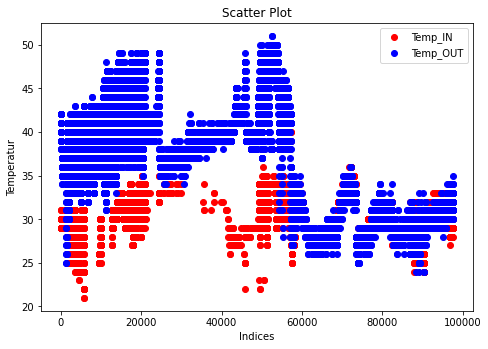

In [ ]:
# plotting the values

plt.figure(figsize=(10,10)) #set the size of the figure
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_IN.index,df_IN.temp,color='r')
ax.scatter(df_OUT.index,df_OUT.temp,color='b')
ax.set_xlabel('Indices')
ax.set_ylabel('Temperatur')
ax.legend(['Temp_IN','Temp_OUT'])
ax.set_title('Scatter Plot')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c6e2276d0>,
      dtype=object)

<Figure size 1080x1080 with 0 Axes>

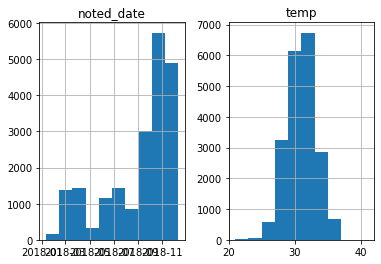

In [ ]:
#chain the . hist() function to the dataframe. This will return the histogram for each numeric column in the pandas dataframe.
plt.figure(figsize=(15,15))  
df_IN.hist()

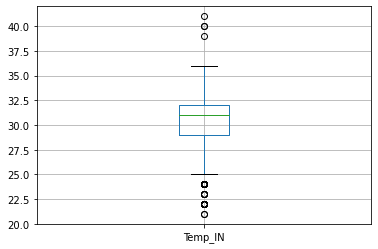

In [ ]:
df_INOUT.boxplot("Temp_IN")

In [ ]:
df_OUT.head()

,id,room_id/id,noted_date,temp,out/in
16217,__export__.temp_log_146101_e61c18d4,Room Admin,01-11-2018 00:07,40,Out
16216,__export__.temp_log_111262_7b3ed086,Room Admin,01-11-2018 00:09,39,Out
16215,__export__.temp_log_147650_344507e9,Room Admin,01-11-2018 00:13,40,Out
16214,__export__.temp_log_139505_cd77d7f9,Room Admin,01-11-2018 00:23,40,Out
16213,__export__.temp_log_127981_32c85db7,Room Admin,01-11-2018 00:25,40,Out
